<a href="https://colab.research.google.com/github/w4bo/teaching-handsondatapipelines/blob/main/materials/14-Iris.solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The IRIS challenge

### Goal

It is your job to predict the species for each iris plant. For each iris plant, you must predict the `Species` variable.

### Metric

Submissions are evaluated using the accuracy score. When splitting train and test datasets, the test dataset should contain 40% of the data.

### Requirements

You are allowed to use `numpy`, `pandas`, `matplotlib`, `sns`, and `sk-learn` Python libraries. You can import any model from `sk-learn`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# df = pd.read_csv('datasets/iris.csv')
df = pd.read_csv('https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/materials/datasets/iris.csv')

## Data understanding

Hints
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- Each observation is labelled with a `Species`

Take a first glance to the `df`
- Do we consider all features?
- Are there null values?
- Which are the attribute types?
- Which are the attribute ranges?
- How many labels?
- Are classes unbalanced?

In [2]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### Summing up

| Question | Answer | Do we need action? |
| -        | -      | - |
| Are the null values? | No | No imputation |
|Which are the attribute types? | All attributes are numeric | No encoding |
|Which are the attribute ranges? | Attribute ranges are similar | No normalization |
|How many labels? | 3 | - |
|Are classes unbalanced? | No, classess are equally distributed | No rebalancing |

IRIS is a simple dataset, it is useful for this lab but is not really representative for real-world ML tasks.

### Data visualization

Check the value distribution

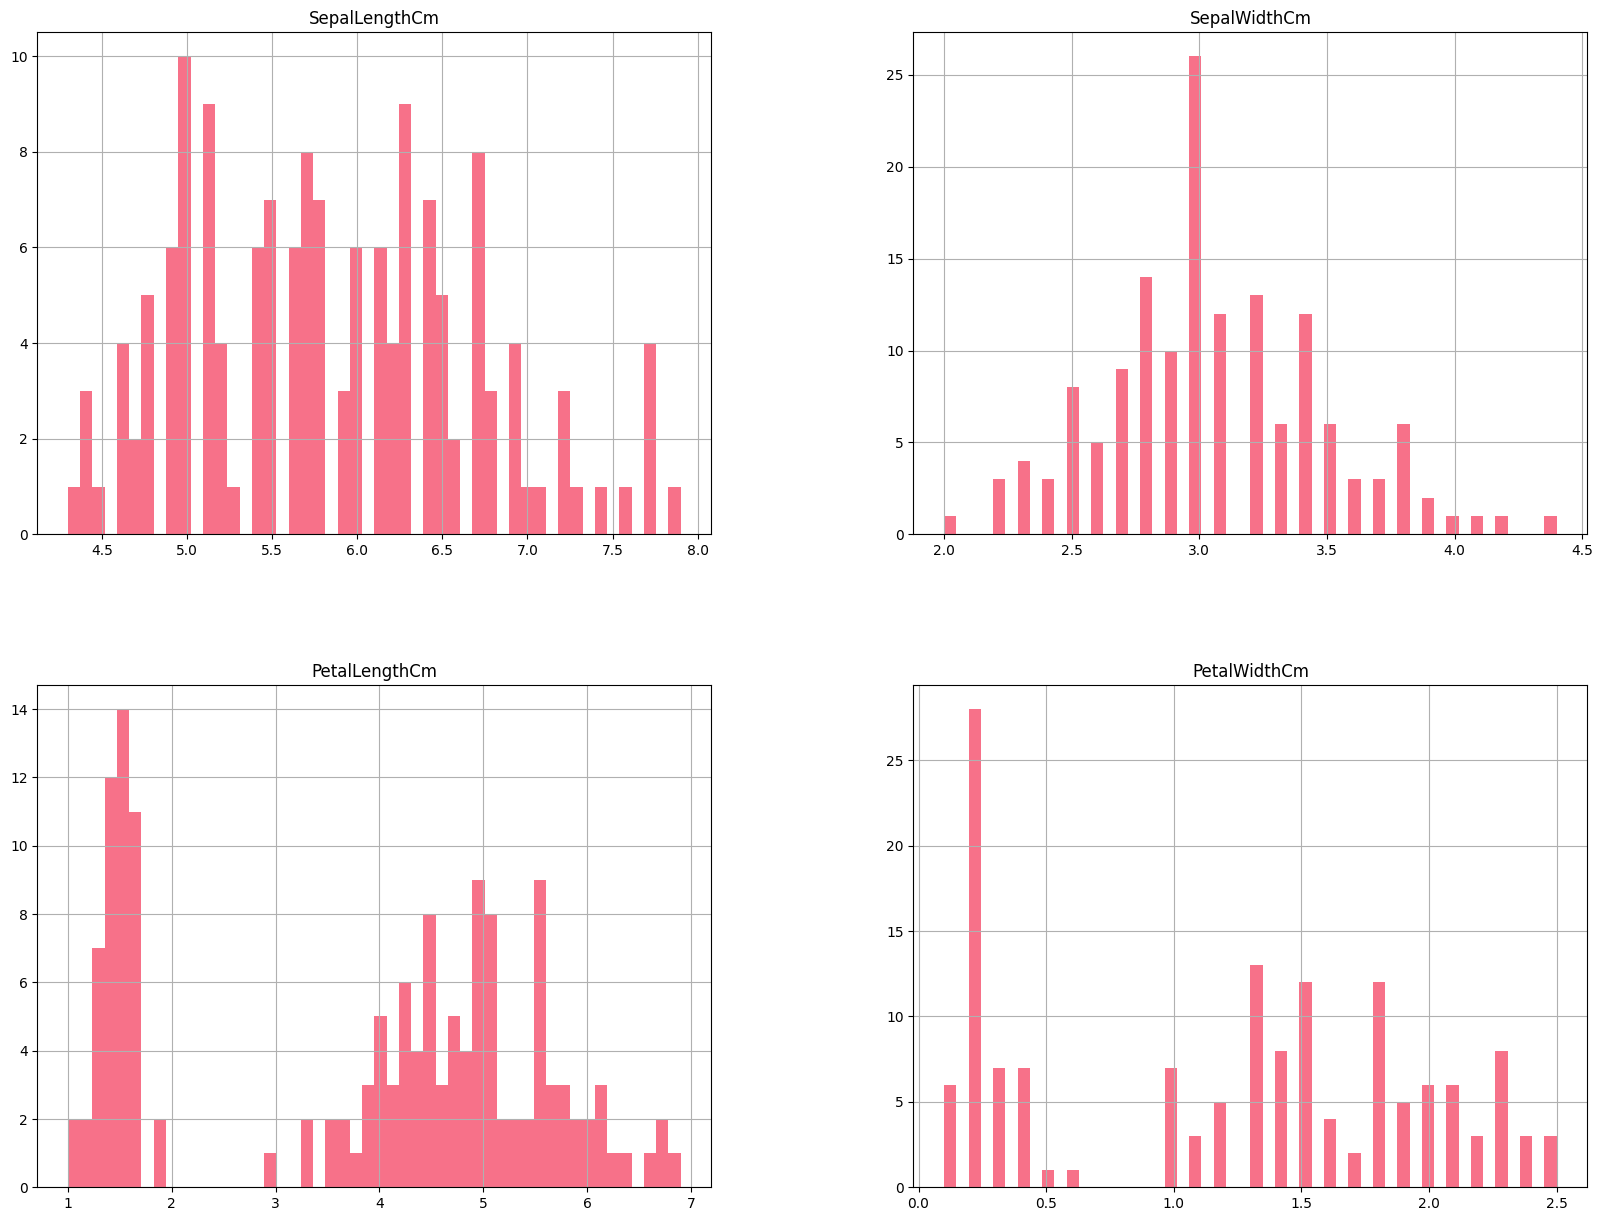

In [6]:
tmp = df.drop('Id', axis=1)
tmp.hist(bins=50, figsize=(20,15))
plt.show()

Check variable relationships

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

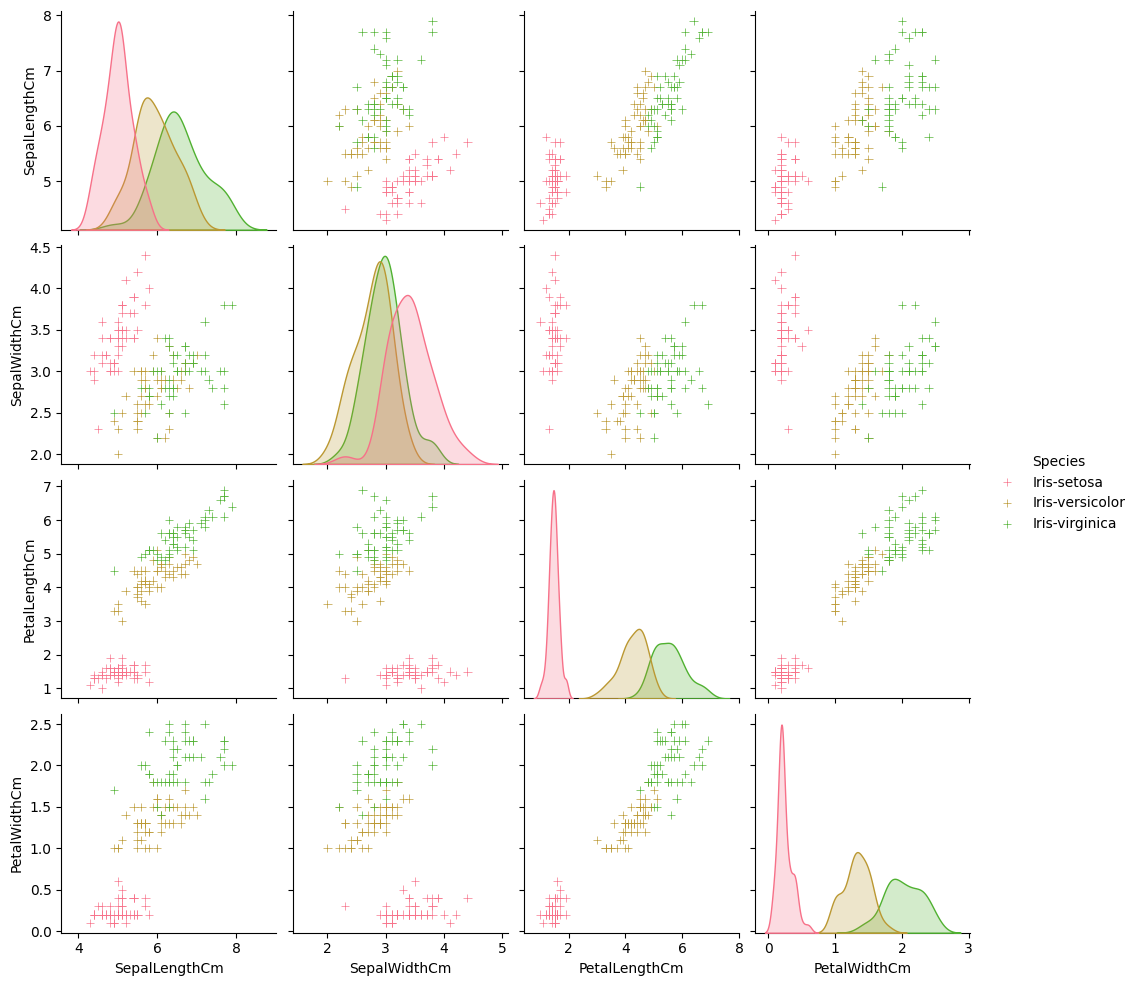

In [7]:
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


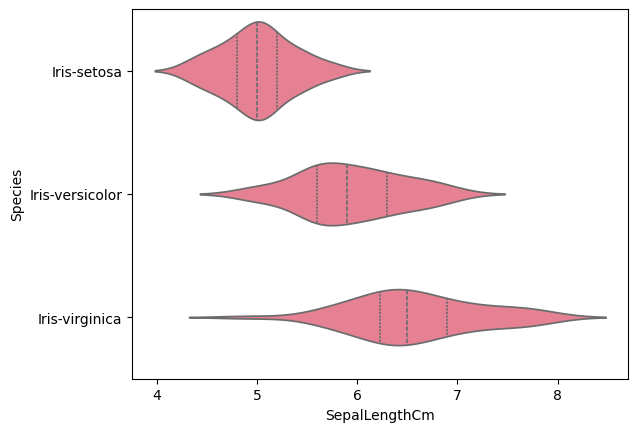

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


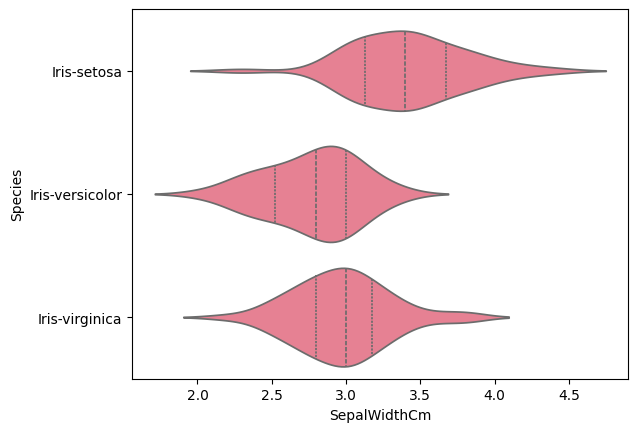

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


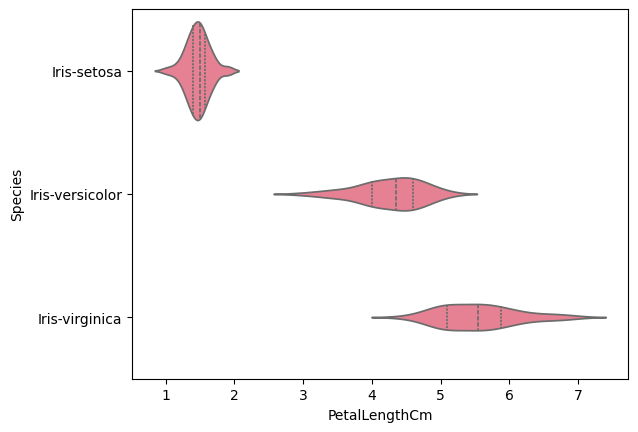

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


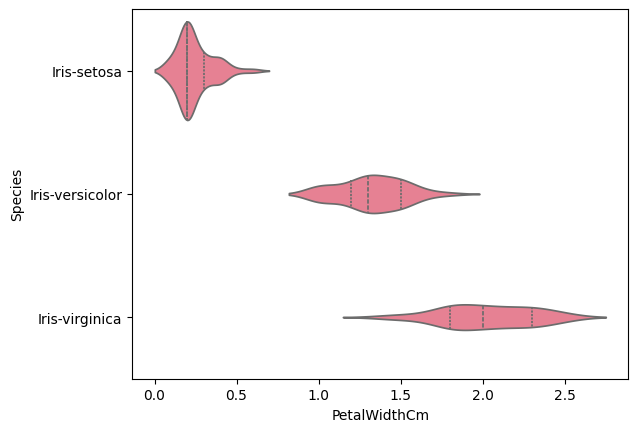

In [8]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

In [9]:
from scipy.stats import pearsonr
rho = tmp.corr(method ='pearson', numeric_only = True)
pval = tmp.corr(method=lambda x, y: pearsonr(x, y)[1], numeric_only = True) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01, 0.05, 0.1] if x <= t]))
rho.round(2).astype(str) + p

<ipython-input-9-ea7521806bb6>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p = pval.applymap(lambda x: ''.join(['*' for t in [0.01, 0.05, 0.1] if x <= t]))


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.0***,-0.11,0.87***,0.82***
SepalWidthCm,-0.11,1.0***,-0.42***,-0.36***
PetalLengthCm,0.87***,-0.42***,1.0***,0.96***
PetalWidthCm,0.82***,-0.36***,0.96***,1.0***


<Axes: >

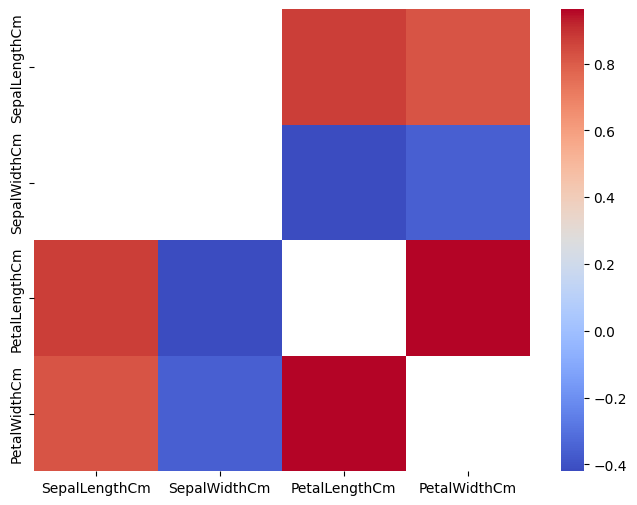

In [10]:
min_corr = 0.3
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(8, 6))
sns.heatmap(kot, cmap=sns.color_palette("coolwarm", as_cmap=True))

#### Summing up

- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

## Modeling with scikit-learn

Preparing the dataset for the ML pipeline.
- X: the dataset
- y: the labels

In [11]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [12]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


## Train and test on the same dataset

- Pick a classifier from SKLearn (e.g., logistic regression, decision tree, random forest, k-NN classifier) and train your model on the entire dataset

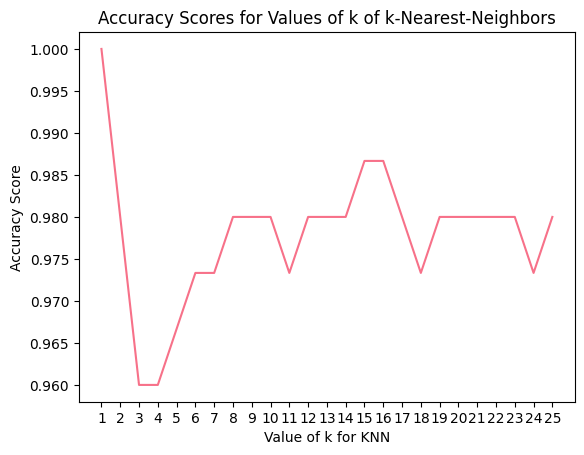

In [14]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

plt.plot(k_range, scores)
plt.xticks(k_range)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [15]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


### Summing up

- Training on the entire dataset *is not* suggested since the end goal is to predict iris species using a dataset the model has not seen before.
- There is also a *high* risk of overfitting the training data.

## Split the dataset into a training set and a testing set

### Advantages
- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.
- More flexible and faster than creating a model using all of the dataset for training.

### Disadvantages
- The accuracy scores for the testing set can vary depending on what observations are in the set.
- This disadvantage can be countered using k-fold cross-validation.

### Notes
- The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
- As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
- If a model is too complex or not complex enough, the testing accuracy is lower.
- For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

Split the training and test sets such that the test set contains 40% of the data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


Fit your model and try it with several parameters

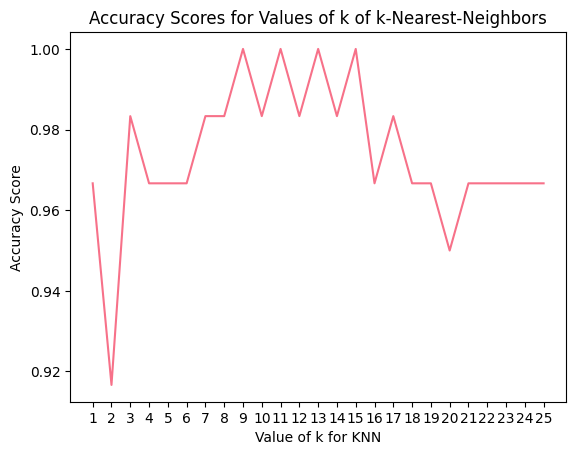

In [17]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xticks(k_range)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

You can also try different models (check https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


Predict the outcome of an unseen observation (hint use the `.predict()` method)

In [19]:
# To train the model on the entire dataset
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)
y_pred = knn.predict(X)
metrics.accuracy_score(y, y_pred)

0.98

In [20]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

In [21]:
logreg.predict([[6, 3, 4, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

## Doing some plots

In [22]:
xlabel = "Lunghezza del petalo (cm)"
ylabel = "Larghezza del petalo (cm)"
ctitle = "IRIS"
legend = "Classe"
figsize = (8,6)
xlim=[0, 7]
ylim=[0, 3]

<ipython-input-23-0eace3ab29c0>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

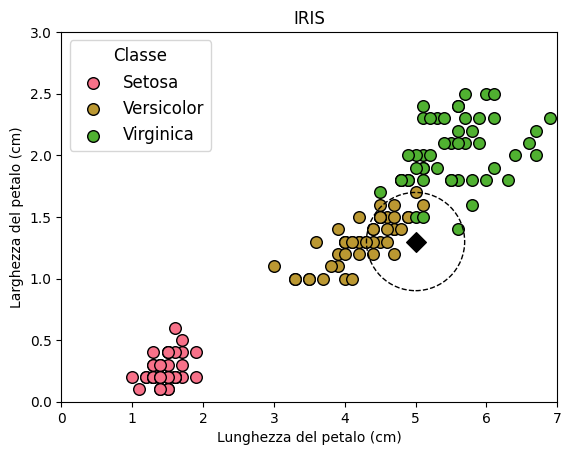

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# Download the saved image file
from google.colab import files

# Load Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Selecting petal width and petal length columns
y = iris.target

# Map target labels to class names
class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
target_names = [class_names[i] for i in range(len(class_names))]
# Plot the dataset points
for i, class_name in enumerate(target_names):
    class_data = X[y == i]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(ctitle)
plt.legend(title=legend, loc=2)

for ext in ["svg", "pdf", "jpg"]:
  plt.savefig(f'iris.{ext}')
  files.download(f'iris.{ext}')

plt.scatter(5, 1.3, s=5000, facecolors='none', edgecolors='black', linestyle='--')
plt.scatter(5, 1.3, s=100, marker="D", facecolors='black', edgecolors='black')

for ext in ["svg", "pdf", "jpg"]:
  plt.savefig(f'knn.{ext}')
  files.download(f'knn.{ext}')

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

# Define the colormap (Tableau)
my_colors=['#1f77b4', '#ff7f0e', '#2ca02c']
tableau_cmap = ListedColormap(my_colors)

def plot_boundary(clf, title, norm=False):
    # Load Iris dataset
    iris = load_iris()

    cxlim = xlim if not norm else [-0.02, 1.02]
    cylim = ylim if not norm else [-0.02, 1.02]

    X = iris.data[:, 2:4]  # Selecting petal width and petal length columns
    y = iris.target

    if norm:
      scaler = MinMaxScaler(feature_range=(0, 1))
      X = scaler.fit_transform(X)

    # Train a classifier
    clf.fit(X, y)

    # Create a meshgrid for plotting decision boundaries
    x_min, x_max = [cxlim[0] - 0.5, cxlim[1] + 0.5] # X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = [cylim[0] - 0.5, cylim[1] + 0.5] # X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005), np.arange(y_min, y_max, 0.005))

    # Predict the class for each point in the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=figsize)
    plt.contour(xx, yy, Z, colors='white', linewidths=1, alpha=0.8)
    plt.contourf(xx, yy, Z, cmap=tableau_cmap, alpha=0.3)


    # Map target labels to class names
    class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
    target_names = [class_names[i] for i in range(len(class_names))]
    # Plot the dataset points
    for i, class_name in enumerate(target_names):
        class_data = X[y == i]
        plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)

    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 16

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.xlim(cxlim)
    plt.ylim(cylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(ctitle)
    plt.legend(title=legend, loc=2)

    for ext in ["svg", "pdf", "jpg"]:
      # Save the plot as an image file
      plt.savefig(f'{title}.{ext}')
      files.download(f'{title}.{ext}')

    return clf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

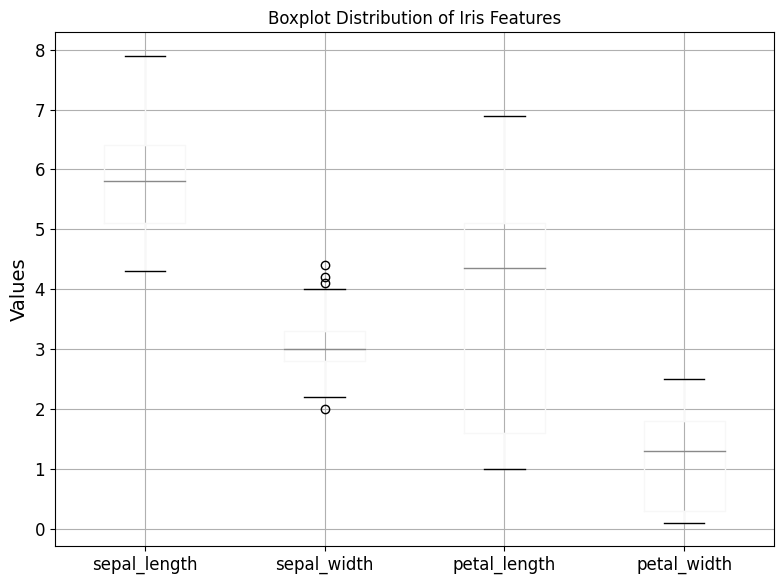

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')

# Plot the boxplot distribution of the numerical features
plt.figure(figsize=figsize)
iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Add a title and axis labels
plt.title('Boxplot Distribution of Iris Features')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()

for ext in ["svg", "pdf", "jpg"]:
  print()
  # Save the plot as an image file
  plt.savefig(f'iris-boxplot.{ext}')
  files.download(f'iris-boxplot.{ext}')

<ipython-input-26-927304b3a98f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='petal_length', data=iris, inner='quartile', palette=my_colors)


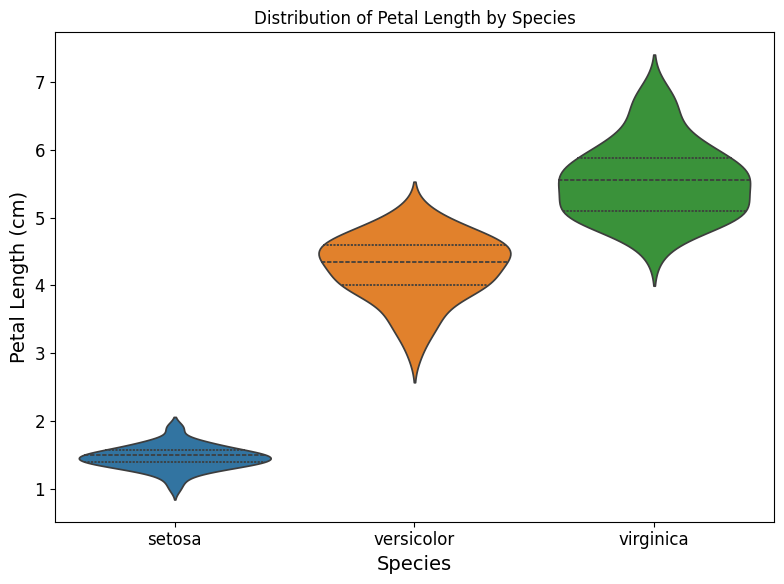

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')

# Create a violin plot to show the distribution of petal length by species
plt.figure(figsize=figsize)
sns.violinplot(x='species', y='petal_length', data=iris, inner='quartile', palette=my_colors)

# Add title and labels
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-27-cb7a992e7b99>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  petal_length_counts = iris.groupby(['petal_length_bins', 'species']).size().unstack(fill_value=0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-27-cb7a992e7b99>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  petal_length_counts = iris.groupby(['petal_length_bins', 'species']).size().unstack(fill_value=0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

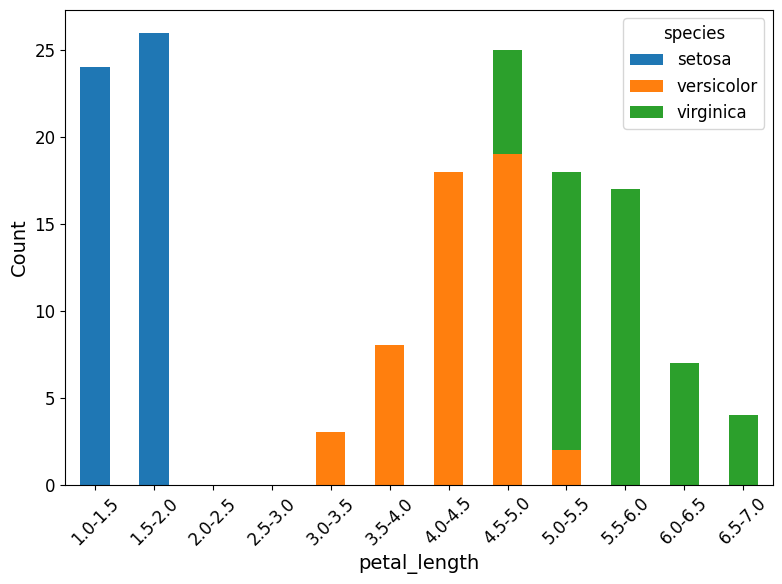

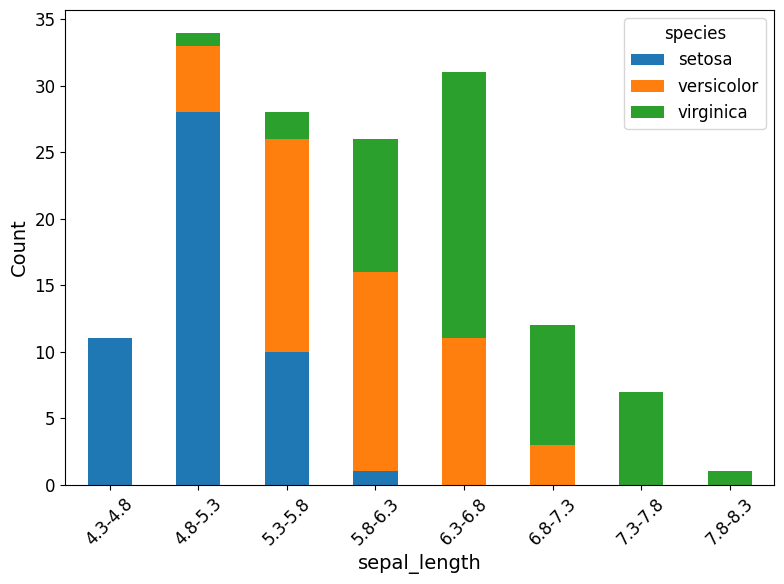

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def distrib(feature):
    # Load the Iris dataset from seaborn
    iris = sns.load_dataset('iris')
    # print(iris)
    # Get the min and max petal lengths
    min_length = iris[feature].min()
    max_length = iris[feature].max()

    # Create bins dynamically from min to max with 0.5 intervals
    bins = np.arange(min_length, max_length + 0.5, 0.5)  # Add 0.5 to include the max value in the last bin
    labels = [f'{b:.1f}-{b + 0.5:.1f}' for b in bins[:-1]]  # Create labels for each bin

    # Bin the petal lengths
    iris['petal_length_bins'] = pd.cut(iris[feature], bins=bins, labels=labels, right=False)

    # Count the occurrences of each bin per species
    petal_length_counts = iris.groupby(['petal_length_bins', 'species']).size().unstack(fill_value=0)


    # Plot a stacked bar chart
    petal_length_counts.plot(kind='bar', stacked=True, color=my_colors, figsize=figsize)

    # Add title and labels
    # plt.title('Stacked Bar Chart of Iris Species Count by Binned Petal Length')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    for ext in ["svg", "pdf", "jpg"]:
      # Save the plot as an image file
      plt.savefig(f'{feature}-boxplot.{ext}')
      files.download(f'{feature}-boxplot.{ext}')

distrib('petal_length')
distrib('sepal_length')

<ipython-input-24-02361fce47b3>:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

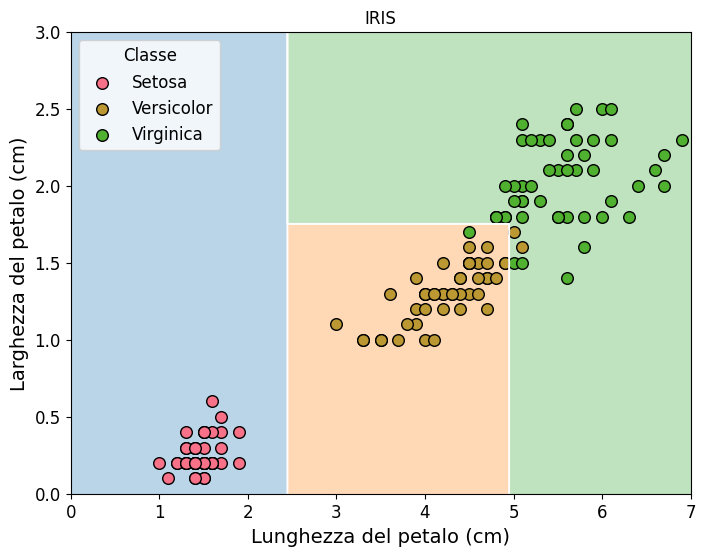

In [28]:
tree = plot_boundary(DecisionTreeClassifier(max_depth=3, random_state=2), "decisiontree_cplot")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

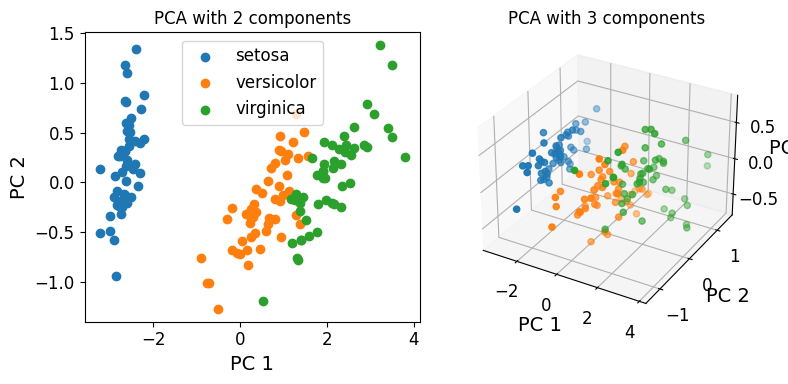

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd
from google.colab import files

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Compute PCA with 2 components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

# Compute PCA with 3 components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X)

# Plot PCA with 2 components
plt.figure(figsize=(8, 4))

# 2D plot
plt.subplot(1, 2, 1)
for color, i, target_name in zip(my_colors, [0, 1, 2], target_names):
    plt.scatter(X_pca_2[y == i, 0], X_pca_2[y == i, 1], color=color, label=target_name)
plt.legend()
plt.title("PCA with 2 components")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

# Plot PCA with 3 components (3D plot)
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(1, 2, 2, projection='3d')
for color, i, target_name in zip(my_colors, [0, 1, 2], target_names):
    ax.scatter(X_pca_3[y == i, 0], X_pca_3[y == i, 1], X_pca_3[y == i, 2], color=color, label=target_name)
ax.set_title("PCA with 3 components")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

plt.tight_layout()

for ext in ["svg", "pdf", "jpg"]:
  # Save the plot as an image file
  plt.savefig(f'pca.{ext}')
  files.download(f'pca.{ext}')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

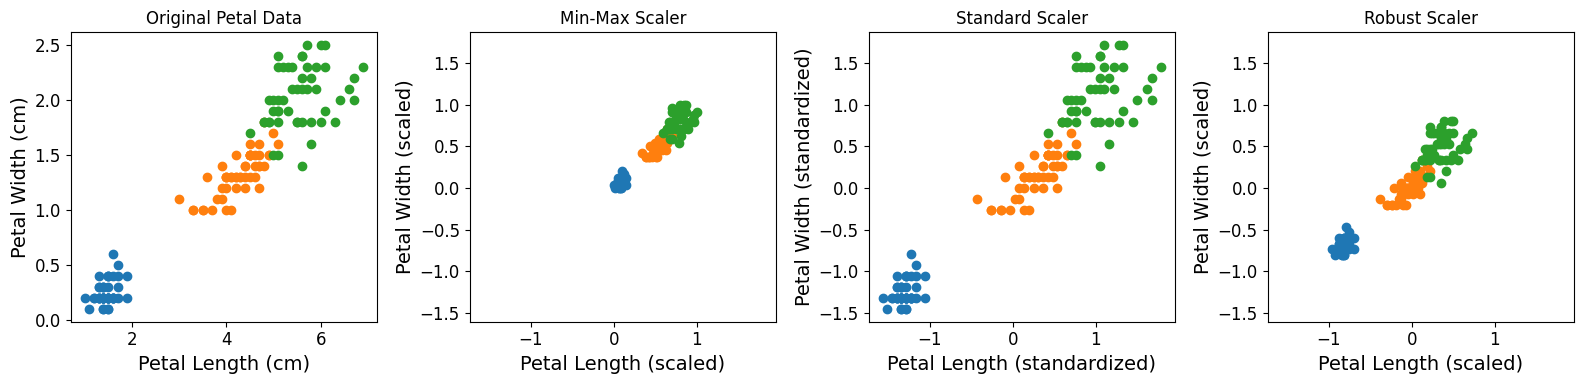

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Extract petal length and petal width from the iris dataset
petal_data = iris.data[:, 2:4]
y = iris.target

# Apply Min-Max normalization
min_max_scaler = MinMaxScaler()
petal_data_minmax = min_max_scaler.fit_transform(petal_data)

# Apply Standardization
standard_scaler = StandardScaler()
petal_data_standardized = standard_scaler.fit_transform(petal_data)

# Apply Robust Scaling
robust_scaler = RobustScaler()
petal_data_robust = robust_scaler.fit_transform(petal_data)

# Plot the results
plt.figure(figsize=(16, 4))

# Original Data
ax1 = plt.subplot(1, 4, 1)
for color, i, target_name in zip(my_colors, [0, 1, 2], target_names):
    plt.scatter(petal_data[y == i, 0], petal_data[y == i, 1], color=color, label=target_name)
plt.title("Original Petal Data")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

# Min-Max Scaled Data
ax2 = plt.subplot(1, 4, 2)
for color, i, target_name in zip(my_colors, [0, 1, 2], target_names):
    plt.scatter(petal_data_minmax[y == i, 0], petal_data_minmax[y == i, 1], color=color, label=target_name)
plt.title("Min-Max Scaler")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")

# Standardized Data
ax3 = plt.subplot(1, 4, 3, sharex = ax2, sharey = ax2)
for color, i, target_name in zip(my_colors, [0, 1, 2], target_names):
    plt.scatter(petal_data_standardized[y == i, 0], petal_data_standardized[y == i, 1], color=color, label=target_name)
plt.title("Standard Scaler")
plt.xlabel("Petal Length (standardized)")
plt.ylabel("Petal Width (standardized)")


# Robust Scaled Data
plt.subplot(1, 4, 4, sharex = ax3, sharey = ax3)
for color, i, target_name in zip(my_colors, [0, 1, 2], target_names):
    plt.scatter(petal_data_robust[y == i, 0], petal_data_robust[y == i, 1], color=color, label=target_name)
plt.title("Robust Scaler")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")

plt.tight_layout()

for ext in ["svg", "pdf", "jpg"]:
  # Save the plot as an image file
  plt.savefig(f'normalized.{ext}')
  files.download(f'normalized.{ext}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

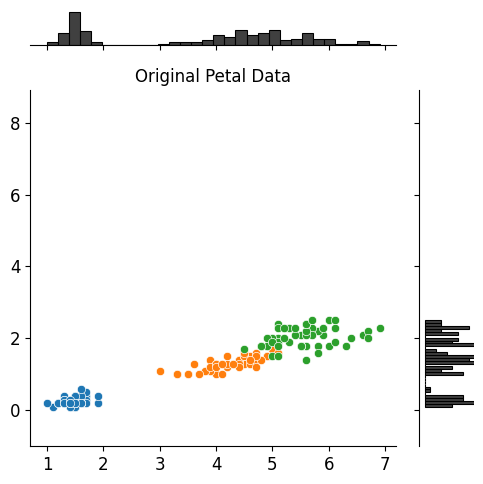

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

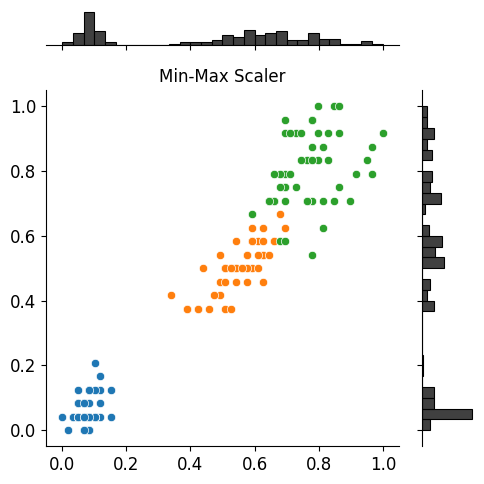

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

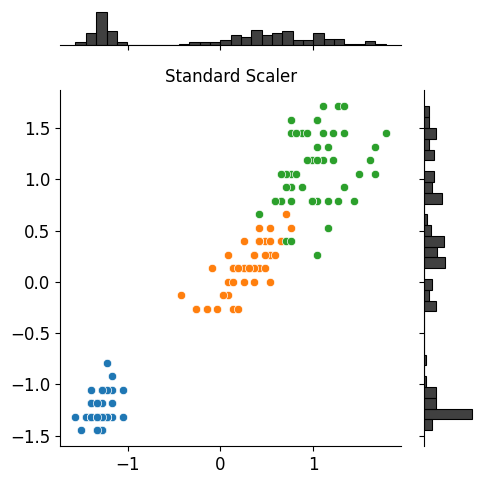

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

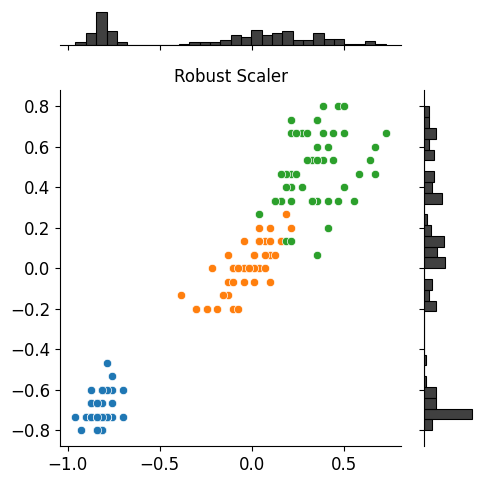

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

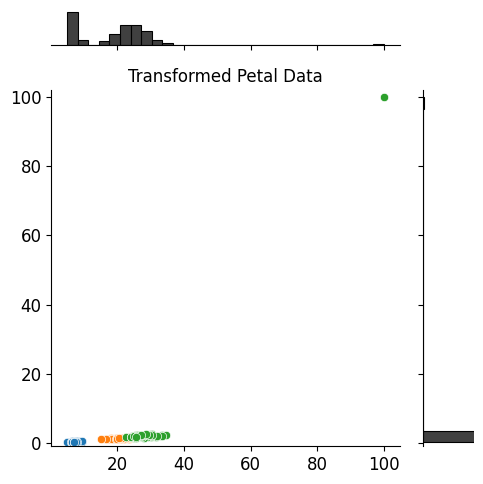

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

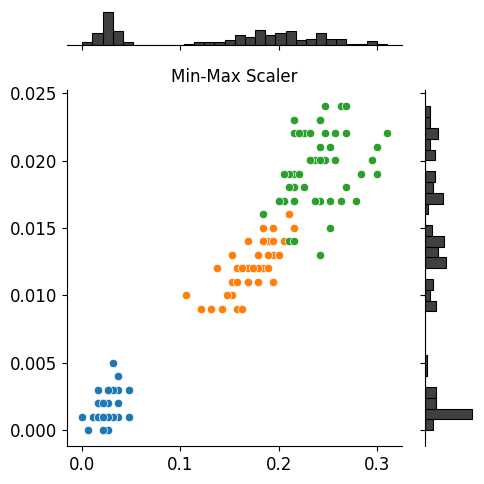

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

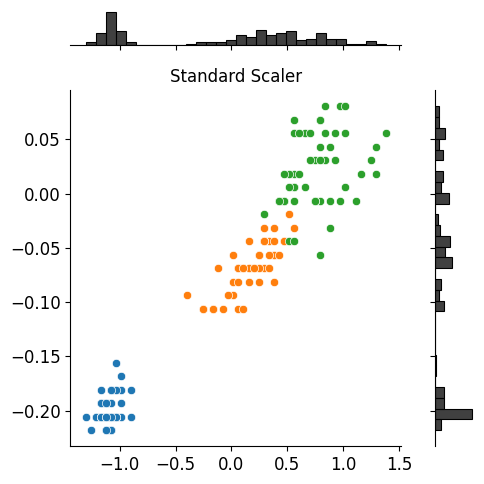

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

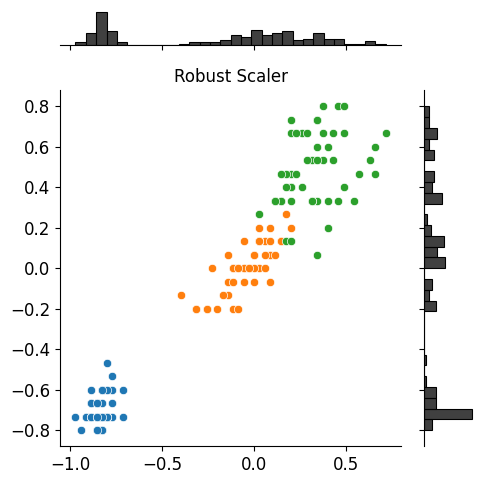

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Create a function to plot the data with distribution on top
def plot_with_distribution(petal_data, title, first=False, y=None, distortion=False, my_colors=my_colors):
  g = sns.JointGrid(height=5)
  for color, i in zip(my_colors + [my_colors[2]], [0, 1, 2, 3]):
    if not first and i > 2: pass
    else: sns.scatterplot(x=petal_data[y == i, 0],  y=petal_data[y == i, 1], color=color, ax=g.ax_joint)
    # g.plot(sns.scatterplot, sns.histplot)

  if first:
    sns.histplot(x=petal_data[:, 0], ax=g.ax_marg_x, color="black", bins=30)
    sns.histplot(y=petal_data[:, 1], ax=g.ax_marg_y, color="black", bins=30)
  else:
    sns.histplot(x=petal_data[:-2, 0], ax=g.ax_marg_x, color="black", bins=30)
    sns.histplot(y=petal_data[:-2, 1], ax=g.ax_marg_y, color="black", bins=30)
  # g.ax_joint.set_xlabel("Petal Length")
  # g.ax_joint.set_ylabel("Petal Width")
  g.ax_joint.set_title(title)
  lim = [min(0, petal_data[:, 0].min(), petal_data[:, 1].min()) - 1, max(0, petal_data[:, 0].max(), petal_data[:, 1].max()) + 2]

  if first:
    plt.xlim(lim)
    plt.ylim(lim)

  plt.tight_layout()
  for ext in ["svg"]:  # , "pdf", "jpg"
    # Save the plot as an image file
    fname = f'normalized-{title.replace("-", "").replace(" ", "").lower()}-distortion-{distortion}.{ext}'
    plt.savefig(fname)
    files.download(fname)

    plt.show()

def plot_norm(distortion, my_colors=my_colors):
  # Load the Iris dataset
  iris = load_iris()
  petal_data = iris.data[:, 2:4]

  target_names = iris.target_names
  y = iris.target


  if distortion:
    petal_data[:, 0] *= 5
    petal_data = np.append(petal_data, np.array([[100, 100]]), axis=0)
    y = np.append(iris.target, [3])
    target_names = np.append(target_names, ["foo"])

  # Apply Min-Max normalization
  min_max_scaler = MinMaxScaler()
  petal_data_minmax = min_max_scaler.fit_transform(petal_data)

  # Apply Standardization
  standard_scaler = StandardScaler()
  petal_data_standardized = standard_scaler.fit_transform(petal_data)

  # Apply Robust Scaling
  robust_scaler = RobustScaler()
  petal_data_robust = robust_scaler.fit_transform(petal_data)

  # Original Data
  plot_with_distribution(petal_data, f"{'Original Petal Data' if not distortion else 'Transformed Petal Data'}", first=True, y=y, distortion=distortion)
  # Min-Max Scaled Data
  plot_with_distribution(petal_data_minmax, "Min-Max Scaler", y=y, distortion=distortion)
  # Standardized Data
  plot_with_distribution(petal_data_standardized, "Standard Scaler", y=y, distortion=distortion)
  # Robust Scaled Data
  plot_with_distribution(petal_data_robust, "Robust Scaler", y=y, distortion=distortion)

plot_norm(distortion=False)
plot_norm(distortion=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

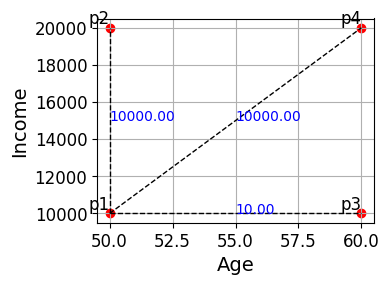

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Points
p1 = (50, 10000)
p2 = (50, 20000)
p3 = (60, 10000)
p4 = (60, 20000)

# Extract x and y coordinates
x_coords = [p1[0], p2[0], p3[0], p4[0]]
y_coords = [p1[1], p2[1], p3[1], p4[1]]

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

plt.figure(figsize=(4, 3))
# Plotting the points
plt.scatter(x_coords, y_coords, color='red')

# Annotating the points
for i, (x, y) in enumerate(zip(x_coords, y_coords), 1):
    plt.text(x, y, f'p{i}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')


# Plotting dotted lines and showing Euclidean distances
points = [p1, p2, p3, p4]
for i in range(1): # len(points)
    for j in range(i + 1, len(points)):
        p_start, p_end = points[i], points[j]
        plt.plot([p_start[0], p_end[0]], [p_start[1], p_end[1]], 'k--', lw=1)
        dist = euclidean_distance(p_start, p_end)
        # Find the midpoint to place the distance label
        midpoint = ((p_start[0] + p_end[0]) / 2, (p_start[1] + p_end[1]) / 2)
        plt.text(midpoint[0], midpoint[1], f'{dist:.2f}', fontsize=10, color='blue')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Income")

# Display plot
plt.grid(True)
plt.tight_layout()

for ext in ["svg"]:  # , "pdf", "jpg"
  # Save the plot as an image file
  fname = f'points.{ext}'
  plt.savefig(fname)
  files.download(fname)

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

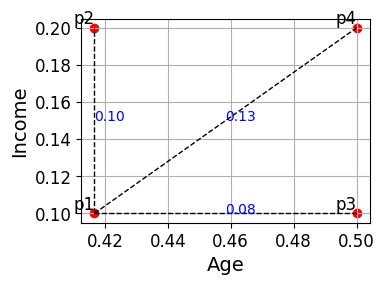

In [59]:
# Min-Max normalization function
def min_max_normalize(points):
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]

    x_min, x_max = min(x_vals), max(x_vals)
    y_min, y_max = min(y_vals), max(y_vals)

    normalized_points = [( (x - x_min) / (x_max - x_min), (y - y_min) / (y_max - y_min) ) for x, y in points]
    return normalized_points

# Normalized points
normalized_points = min_max_normalize([p1, p2, p3, p4, [0, 0], [120, 100000]])

# Extract normalized x and y coordinates
x_coords_norm = [p[0] for p in normalized_points]
y_coords_norm = [p[1] for p in normalized_points]

plt.figure(figsize=(4, 3))
# Plotting the normalized points
plt.scatter(x_coords_norm[:-2], y_coords_norm[:-2], color='red')

# Annotating the normalized points
for i, (x, y) in enumerate(zip(x_coords_norm[:-2], y_coords_norm[:-2]), 1):
    plt.text(x, y, f'p{i}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Plotting dotted lines and showing Euclidean distances between normalized points
for i in range(1):
    for j in range(i + 1, len(normalized_points) - 2):
        p_start, p_end = normalized_points[i], normalized_points[j]
        plt.plot([p_start[0], p_end[0]], [p_start[1], p_end[1]], 'k--', lw=1)
        dist = euclidean_distance(p_start, p_end)
        # Find the midpoint to place the distance label
        midpoint = ((p_start[0] + p_end[0]) / 2, (p_start[1] + p_end[1]) / 2)
        plt.text(midpoint[0], midpoint[1], f'{dist:.2f}', fontsize=10, color='blue')
# Add labels and title
plt.xlabel("Age")
plt.ylabel("Income")

# Display plot
plt.grid(True)
plt.tight_layout()

for ext in ["svg"]:  # , "pdf", "jpg"
  # Save the plot as an image file
  fname = f'points_norm.{ext}'
  plt.savefig(fname)
  files.download(fname)

# Display normalized plot
plt.grid(True)
plt.show()


In [32]:
# Plot the decision tree
# plt.figure(figsize=figsize)
# plot_tree(tree, feature_names=['Petal Width', 'Petal Length'], class_names=[str(target) for target in iris.target_names], filled=True, rounded=True)


<ipython-input-24-02361fce47b3>:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNeighborsClassifier(n_neighbors=20)

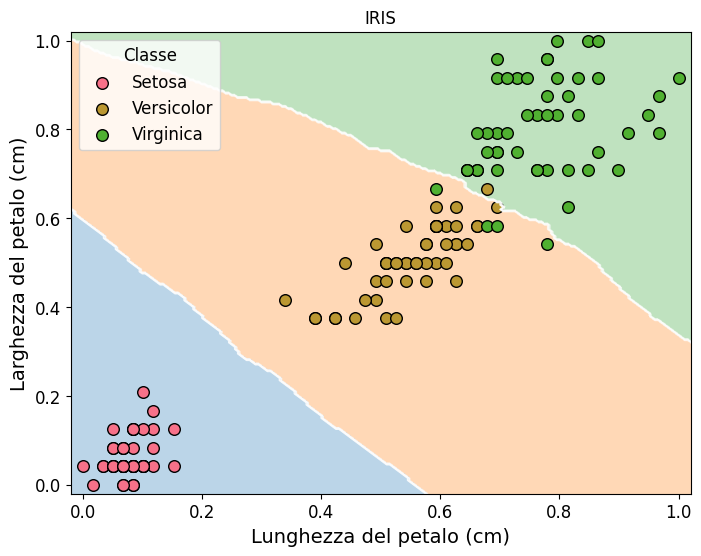

In [33]:
from sklearn.neighbors import KNeighborsClassifier
plot_boundary(KNeighborsClassifier(n_neighbors=20), "knn_cplot", norm=True)

<ipython-input-24-02361fce47b3>:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomForestRegressor()

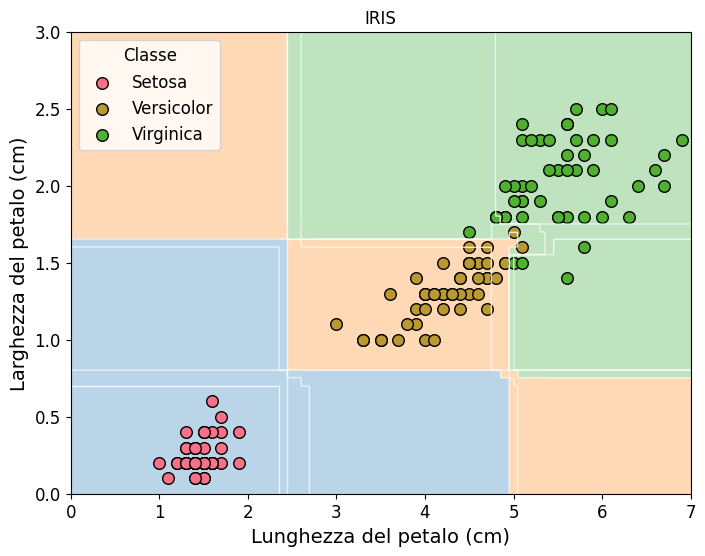

In [34]:
from sklearn.ensemble import RandomForestRegressor
plot_boundary(RandomForestRegressor(), "rf_cplot")

<ipython-input-24-02361fce47b3>:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Perceptron()

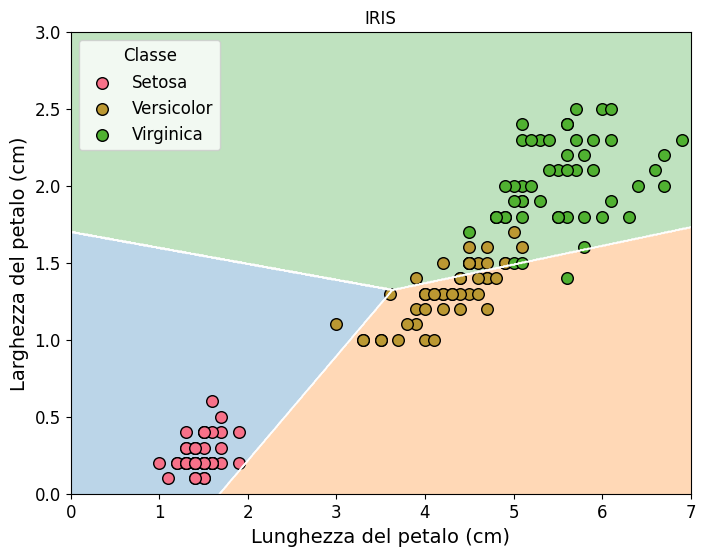

In [35]:
# Perceptron uses the OVA (One Versus All) strategy for multiclasses
plot_boundary(Perceptron(), "perceptron_cplot")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-24-02361fce47b3>:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MLPClassifier(hidden_layer_sizes=(10, 20), random_state=42)

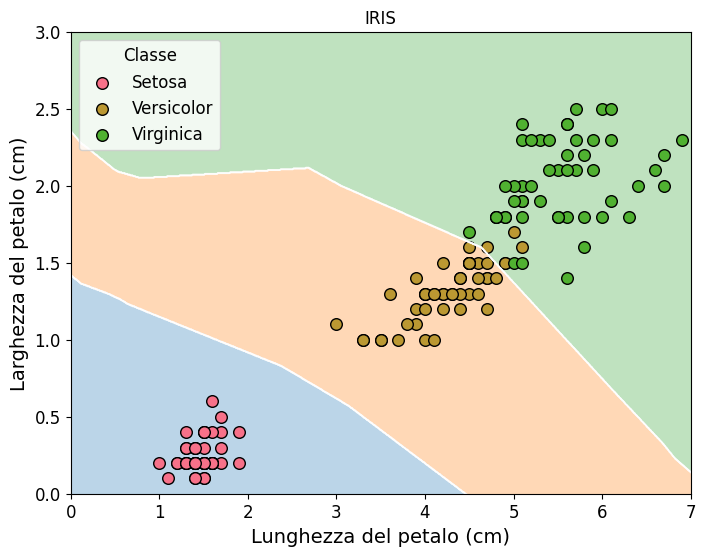

In [36]:
from sklearn.neural_network import MLPClassifier
plot_boundary(MLPClassifier(hidden_layer_sizes=(10, 20), random_state=42), "mlp_cplot")

NameError: name 'title' is not defined

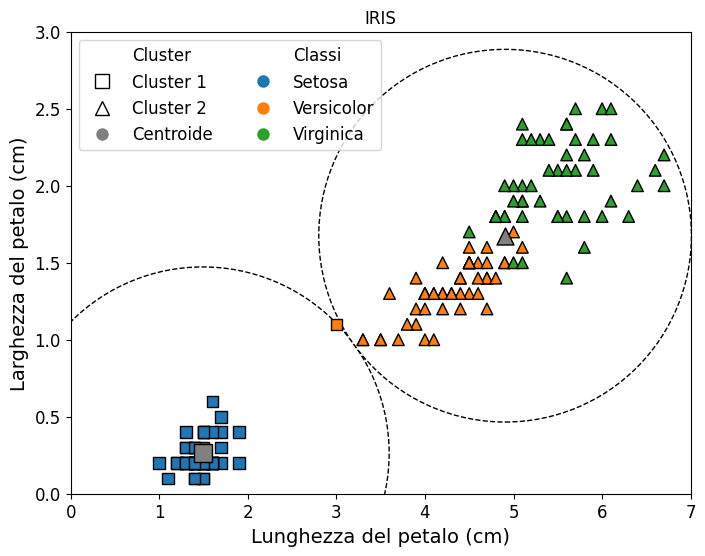

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Select petal length and petal width for clustering
df = df[['petal length (cm)', 'petal width (cm)']]
df["target"] = iris["target"]
df = df[df['petal length (cm)'] < 6.8]
X = df[['petal length (cm)', 'petal width (cm)']]

colors = ['tab:blue', 'tab:orange', 'tab:green']

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=figsize)

# Plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], ls='--', c='white', edgecolors='black', s=72000)

markers = ["s", "^"]
for cluster in range(2):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['petal length (cm)'], cluster_data['petal width (cm)'],
                color=cluster_data["target"].apply(lambda x: colors[x]), marker=markers[cluster],
                # color=colors[cluster],
                label=f'Cluster {cluster}', edgecolors='black', s=70)
    plt.scatter(centroids[:, 0][cluster], centroids[:, 1][cluster], marker=markers[cluster], c='grey', edgecolors='black', s=150)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(ctitle)
plt.legend(loc=2)

legend_elements = [Line2D([0], [0], marker='s', color='w', label='Cluster', markerfacecolor='w', markeredgecolor='w', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Cluster 1', markerfacecolor='w', markeredgecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='Cluster 2', markerfacecolor='w', markeredgecolor='black', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Centroide', markerfacecolor='grey', markeredgecolor='w', markersize=10),

                   # Line2D([0], [0], marker='s', color='w', label=' ', markerfacecolor='w', markeredgecolor='w', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Classi', markerfacecolor='w', markeredgecolor='w', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Setosa', markerfacecolor='tab:blue', markeredgecolor='w', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Versicolor', markerfacecolor='tab:orange', markeredgecolor='w', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Virginica', markerfacecolor='tab:green', markeredgecolor='w', markersize=10)]

plt.legend(handles=legend_elements, loc=2, ncol=2)


for ext in ["svg", "pdf", "jpg"]:
  # print()
  # Save the plot as an image file
  plt.savefig(f'{title}.{ext}')
  files.download(f'{title}.{ext}')
plt.tight_layout()
plt.show()